In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
# Loading Results
Baseline = pd.read_csv("../results/yugioh_rulings_baseline.csv")
Rag_1 = pd.read_csv("../results/yugioh_rulings_rag_1chunk_text.csv")
Rag_3 = pd.read_csv("../results/yugioh_rulings_rag_3chunks_text.csv")
Rag_5 = pd.read_csv("../results/yugioh_rulings_rag_5chunks_text.csv")

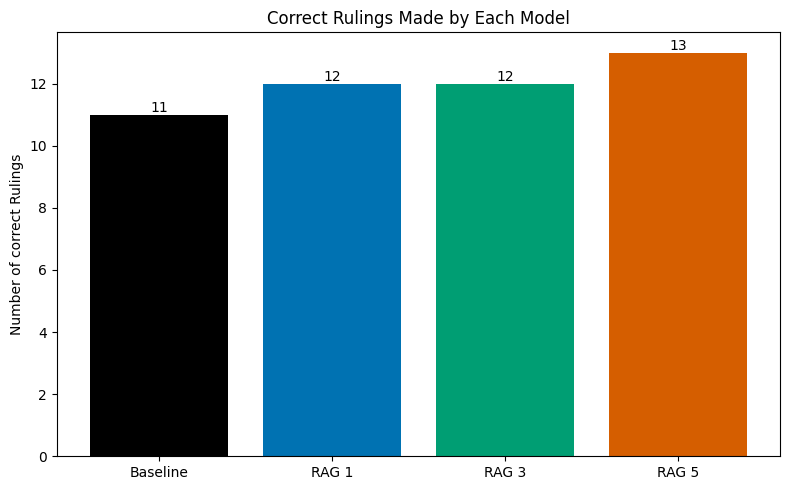

In [3]:
# Counting correct decisions for each model
baseline_matches = (Baseline['baseline_decision'] == Baseline['expected_decision']).sum()
rag1_matches = (Rag_1['rag_decision'] == Rag_1['expected_decision']).sum()
rag3_matches = (Rag_3['rag_decision'] == Rag_3['expected_decision']).sum()
rag5_matches = (Rag_5['rag_decision'] == Rag_5['expected_decision']).sum()

# Putting mathces into a dataframe
results = pd.DataFrame({
    'Model': ['Baseline', 'RAG 1', 'RAG 3', 'RAG 5'],
    'Matches': [baseline_matches, rag1_matches, rag3_matches, rag5_matches]
})

# Colors
colors = [
    "#000000",  # black
    "#0072B2",  # blue
    "#009E73",  # green
    "#D55E00"   # vermillion
]

plt.figure(figsize=(8,5))
bars = plt.bar(results['Model'], results['Matches'], color=colors)

# Adding count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        str(height),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.ylabel("Number of correct Rulings")
plt.title("Correct Rulings Made by Each Model")
plt.tight_layout()
plt.show()

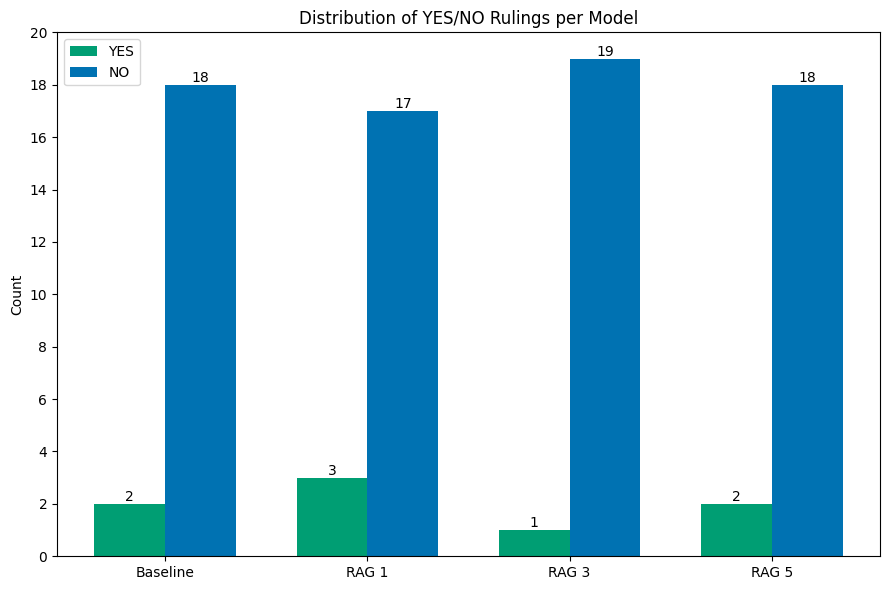

In [6]:
# Counting how many times each model said YES or NO
baseline_counts = Baseline['baseline_decision'].value_counts()
rag1_counts = Rag_1['rag_decision'].value_counts()
rag3_counts = Rag_3['rag_decision'].value_counts()
rag5_counts = Rag_5['rag_decision'].value_counts()

# Building a dataframe of counts
results = pd.DataFrame({
    'Model': ['Baseline', 'RAG 1', 'RAG 3', 'RAG 5'],
    'YES': [
        baseline_counts.get('YES', 0),
        rag1_counts.get('YES', 0),
        rag3_counts.get('YES', 0),
        rag5_counts.get('YES', 0)
    ],
    'NO': [
        baseline_counts.get('NO', 0),
        rag1_counts.get('NO', 0),
        rag3_counts.get('NO', 0),
        rag5_counts.get('NO', 0)
    ]
})

max_val = results[['YES','NO']].values.max()

# colors
colors = {
    'YES': "#009E73",  # green
    'NO':  "#0072B2"   # blue
}

fig, ax = plt.subplots(figsize=(9,6))

# Creating grouped bar chart
bar_positions = range(len(results))
bar_width = 0.35

bars_yes = ax.bar(
    [p - bar_width/2 for p in bar_positions],
    results['YES'],
    width=bar_width,
    label='YES',
    color=colors['YES']
)

bars_no = ax.bar(
    [p + bar_width/2 for p in bar_positions],
    results['NO'],
    width=bar_width,
    label='NO',
    color=colors['NO']
)

# Adding count labels on top of each bar
for bar in list(bars_yes) + list(bars_no):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        str(height),
        ha='center',
        va='bottom',
        fontsize=10
    )

ax.set_xticks(bar_positions)
ax.set_xticklabels(results['Model'])
ax.set_ylabel("Count")
ax.set_yticks(np.arange(0, max_val + 2, 2))
ax.set_title("Distribution of YES/NO Rulings per Model")
ax.legend()
plt.tight_layout()
plt.show()

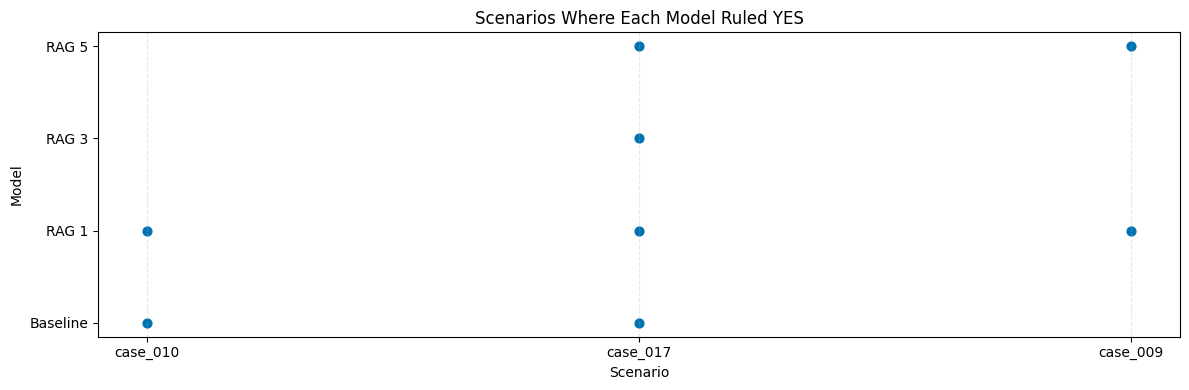

In [ ]:

# Extracting the IDs where each model answered YES
baseline_yes_ids = Baseline.loc[Baseline['baseline_decision'] == 'YES', 'id']
rag1_yes_ids = Rag_1.loc[Rag_1['rag_decision'] == 'YES', 'id']
rag3_yes_ids = Rag_3.loc[Rag_3['rag_decision'] == 'YES', 'id']
rag5_yes_ids = Rag_5.loc[Rag_5['rag_decision'] == 'YES', 'id']

# Building a plotting dataframe
plot_df = pd.DataFrame({
    'Model': ['Baseline'] * len(baseline_yes_ids)
             + ['RAG 1'] * len(rag1_yes_ids)
             + ['RAG 3'] * len(rag3_yes_ids)
             + ['RAG 5'] * len(rag5_yes_ids),
    'id': pd.concat([baseline_yes_ids, rag1_yes_ids, rag3_yes_ids, rag5_yes_ids])
})

# Color
color = "#0072B2"  # blue

plt.figure(figsize=(12, 4))

# Dot plot
plt.scatter(plot_df['id'], plot_df['Model'], color=color, s=40)

plt.xlabel("Scenario")
plt.ylabel("Model")
plt.title("Scenarios Where Each Model Ruled YES")
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [3]:
# Merging the result dataframes
df = (
    Baseline[[
        "id", "game_state", "query",
        "expected_explanation", "expected_decision",
        "baseline_explanation", "baseline_decision"
    ]]
    .merge(
        Rag_1[["id", "rag_explanation", "rag_decision"]]
        .rename(columns={"rag_explanation": "rag1_exp",
                         "rag_decision": "rag1_dec"}),
        on="id"
    )
    .merge(
        Rag_3[["id", "rag_explanation", "rag_decision"]]
        .rename(columns={"rag_explanation": "rag3_exp",
                         "rag_decision": "rag3_dec"}),
        on="id"
    )
    .merge(
        Rag_5[["id", "rag_explanation", "rag_decision"]]
        .rename(columns={"rag_explanation": "rag5_exp",
                         "rag_decision": "rag5_dec"}),
        on="id"
    )
)
df.to_csv("../results/merged_results.csv", index=False)